Analysis of How Multiple Factors Affect NFL Game Scores

Josh McCoy and Zach Goodman

https://github.com/joshmccoy2/joshmccoy2.github.io

# Project Goals

The goal of our project is to analyze different factors that come into play which can affect the outcome of a NFL game's score. The team is also interested in what makes teams successful and unsuccessful. Some factors we will analyze include weather, home field advantages, offensive productivity, and defensive productivity. We will bring in other datasets that have team statistics for each year. These statistics will be items like passing yards, rushing yards, turnovers, sacks, etc. This will show us an overall picture because we will see what Vegas was thinking and what the actually productity of the team was at that specific time. Eventually, we want to create a systematic approach to predicting games/bets based on the most important factors that we identify.



# About The Dataset

We obtained this data from the "NFL Scores and Betting Data" dataset found on Kaggle.com. It contains NFL game results since 1966, and information about the betting odds of each game since 1979, along with information about the weather from each game. The betting odds include the favored team, the over/under of each game and where the game was played. It also contains information about each stadium and team that has ever existed in the NFL.

# Collaboration Plan

We plan to meet at least once a week or as many times as necessary either virtually or in person to discuss where we want our project to go, how to divide up the workload, and to reflect on the work we already have done. We will communicate by text message, and have a shared Google Doc, used to draft writeups and a to-do list. We have setup a shared Github repository to store and update our code. 

As for the future, for Milestone 2, we will be adding in new data sets, we will both be working on creating graphs and visualizations to represent our analyses, and we will also discuss and collaborate on authoring summaries to explain our findings. 

There on after, we will continue to develop our analyses, but mainly focus on preparing the project for the final presentation.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stadiums_df = pd.read_csv("stadiums.csv", encoding="ISO-8859-1") #import Stadium info
teams_df = pd.read_csv("nfl_teams.csv", encoding="ISO-8859-1")  #import Team info
scores_df = pd.read_csv("spreadspoke_scores.csv", encoding="ISO-8859-1") #import each game score/spread info



ModuleNotFoundError: No module named 'matplotlib'

Table 1:

This first table comes from "stadiums.csv", found in the "NFL Scores and Betting Data" dataset. It contains information about all of the stadiums that NFL games have been played in and ample information about each of them. For example, it has the stadium location, both in terms of city and coordinates, the opening and/or closing year of the arena, stadium type, weather type, capacity, and more. This dataframe can be useful in many different ways. Some questions we can answer by examining this dataframe is, which is the best stadium to play a football game in hot weather, or snowy weather? Does stadium capacity affect the outcome of games? Does the elevation, like in Denver, negatively affect the visiting team that isn't used to those conditions? 

In [47]:
stadiums_df

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.4846,-80.2144,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


Lets check the dtypes.

In [45]:
stadiums_df.dtypes

stadium_name                     object
stadium_location                 object
stadium_open                    float64
stadium_close                   float64
stadium_type                     object
stadium_address                  object
stadium_weather_station_code     object
stadium_weather_type             object
stadium_capacity                 object
stadium_surface                  object
STATION                          object
NAME                             object
LATITUDE                        float64
LONGITUDE                       float64
ELEVATION                       float64
dtype: object

checking the dtypes we see that they are properly formatted.

Table 2:

This table comes from "nfl_teams.csv", also found in the "NFL Scores and Betting Data" dataset. It contains information about every team that is currently in the league, or has ever been in the NFL. As you can see, it contains the full and short team names, team IDs, and the teams' conference and division, both before and after 2002.

In [12]:
teams_df

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


The betting data starts in 1979. Therefore, we only want to see the years 1979-present day. 

In [13]:
scores_df = scores_df.set_index("schedule_season")
scores_df = scores_df.loc[1979:]  #limiting the dataFrame to dates 1979 and later because 1979 is when the info about spreads is present
scores_df = scores_df.reset_index()

In [14]:
scores_df.head()

,schedule_season,schedule_date,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,1979,9/1/1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN
1,1979,9/2/1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN
2,1979,9/2/1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN
3,1979,9/2/1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN
4,1979,9/2/1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN


Now, we created a column to add in away and home wins, as well as away and home losses.

In [15]:
scores_df['away_win'] = np.where(scores_df['score_home'] < scores_df['score_away'], 1, 0)
scores_df['away_loss'] = np.where(scores_df['score_home'] > scores_df['score_away'], 1, 0)
scores_df['home_win'] = np.where(scores_df['score_home'] > scores_df['score_away'], 1, 0)
scores_df['home_loss'] = np.where(scores_df['score_home'] < scores_df['score_away'], 1, 0)
scores_df.head()

,schedule_season,schedule_date,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,away_win,away_loss,home_win,home_loss
0,1979,9/1/1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,Houlihan's Stadium,False,79.0,9.0,87.0,NaN,0,1,1,0
1,1979,9/2/1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,...,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN,1,0,0,1
2,1979,9/2/1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,...,Soldier Field,False,78.0,11.0,68.0,NaN,0,1,1,0
3,1979,9/2/1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,...,Mile High Stadium,False,69.0,6.0,38.0,NaN,0,1,1,0
4,1979,9/2/1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,...,Arrowhead Stadium,False,76.0,8.0,71.0,NaN,0,1,1,0


Now, we want to sum all these wins and losses to create a table to see the total success of these teams.

In [16]:
record = pd.DataFrame()
record["home_win"] = scores_df.groupby("team_home")[["home_win"]].sum() 
record["home_loss"] = scores_df.groupby("team_home")[["home_loss"]].sum() 
record["away_win"] = scores_df.groupby("team_away")[["away_win"]].sum()
record["away_loss"] = scores_df.groupby("team_away")[["away_loss"]].sum()
record["total_win"] = record["home_win"] + record["away_win"] 
record["total_loss"] = record["home_loss"] + record["away_loss"]
record = record.reset_index()
record = record.rename(columns={'team_home': 'team_name'})
del record["home_win"]
del record["home_loss"]
del record["away_win"]
del record["away_loss"]
record

,team_name,total_win,total_loss
0,Arizona Cardinals,202,262
1,Atlanta Falcons,320,383
2,Baltimore Colts,21,51
3,Baltimore Ravens,252,196
4,Buffalo Bills,358,356
5,Carolina Panthers,215,239
6,Chicago Bears,356,351
7,Cincinnati Bengals,305,394
8,Cleveland Browns,256,392
9,Dallas Cowboys,399,323


Finally, we will add this table (record) to our original team table (team_name).

In [83]:
teams_df = teams_df.merge(record, on=["team_name"], how='inner')
teams_df = teams_df.set_index("team_name")
teams_df

,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002,total_win,total_loss
team_name,,,,,,,,,
Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West,202,262
Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West,320,383
Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East,21,51
Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central,252,196
Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East,358,356
Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West,215,239
Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central,356,351
Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central,305,394
Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central,256,392


Now, we will check the dtype. 

In [84]:
teams_df.dtypes

team_name_short            object
team_id                    object
team_id_pfr                object
team_conference            object
team_division              object
team_conference_pre2002    object
team_division_pre2002      object
total_win                   int64
total_loss                  int64
dtype: object

The dtypes for each are correct.

Now, we want to display the total wins by each NFL franchise.

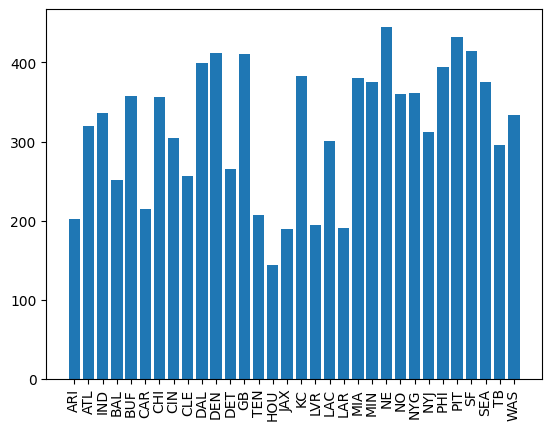

In [111]:
#teams1 = teams_df.groupby("team_id").total_win
#teams1.plot.bar()
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

teams = teams_df.team_id
wins = teams_df.total_win

ax.bar(teams, wins)

plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='both', tight=None)


This bar graph shows how successful NFL franchises have been over time. We will eventually break this down by years in the NFL as some franchises are older than others. We want to identify who has the most successful win percentage overall and what makes them continue to win. 

# Closing Thoughts and Final Goals

Our main goal is to predict what teams are able to cover their Vegas betting odds by identifying what factors make most NFL teams succsessful. We first want to identify how often Vegas is right in their predictions and try to analyze what factors Vegas favors the most when setting lines. Once we have a basic understanding of the Vegas lines system, we want to create our own predictive model that can take advantage of Vegas betting lines that we think our favorable. We will do this by adding outside datasets that have the teams individual statistics. If we can identify what makes teams successful and what is a good matchup for a team, we believe our model could have some success. Some questions we want to answer are: "Is a passing, rushing, or balanced offense more effective?" "What makes a favorable matchup for a specific team?" "What players have had the largest impact when switching teams?" and "How often are Vegas favored teams actually making the playoffs?". 